In [4]:
import pickle

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, date
import datetime as dt
from datetime import timedelta
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import Holt
import scipy.stats as scs

import warnings
warnings.filterwarnings("ignore")
sns.set_style()
%matplotlib inline

# Import statements required for Plotly 
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [8]:
with open('..\\data\\interim\\dataset.pickle', 'rb') as f:
        dataset = pickle.load(f)

In [9]:
dataset

,link,data,file_name,message_content
0,http://kremlin.ru/events/president/transcripts...,2020-01-15,62582,Уважаемые члены Совета Федерации и депутаты Го...
1,http://kremlin.ru/events/president/transcripts...,2019-02-20,59863,Уважаемые члены Совета Федерации! Уважаемые де...
2,http://kremlin.ru/events/president/transcripts...,2018-03-01,56957,Уважаемые граждане России! Уважаемые члены Сов...
3,http://kremlin.ru/events/president/transcripts...,2016-12-01,53379,"Добрый день, уважаемые коллеги! Уважаемые член..."
4,http://kremlin.ru/events/president/transcripts...,2015-12-03,50864,Уважаемые члены Совета Федерации! Уважаемые де...
5,http://kremlin.ru/events/president/transcripts...,2014-12-04,47173,Уважаемые члены Совета Федерации! Депутаты Гос...
6,http://kremlin.ru/events/president/transcripts...,2013-12-12,19825,Уважаемые граждане России! Уважаемые члены Сов...
7,http://kremlin.ru/events/president/transcripts...,2012-12-12,17118,Уважаемые граждане России! Уважаемые члены Сов...
8,http://kremlin.ru/events/president/transcripts...,2011-12-22,14088,Уважаемые граждане России! Уважаемые депутаты ...
9,http://kremlin.ru/events/president/transcripts...,2010-11-30,9637,Уважаемые граждане России! Уважаемые депутаты ...


In [10]:
# preparing words for wordcloud
all_words = " ".join(d for d in dataset['message_content'])

In [11]:
# stopwords
stopwords = set(STOPWORDS)
stopwords.update(["red","blue", "green", "white", "black","pink"])

In [12]:
stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'black',
 'blue',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'green',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'ot

In [14]:
# creating a mask
#ecommerce_mask = np.array(Image.open("/content/cart_inverted.png"))

# creating a new wordcloud
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="black",
                      width=1000, 
                      height=1000, 
                      max_words=2000,
                      #mask=ecommerce_mask, 
                      max_font_size=200,
                      min_font_size=1).generate(all_words)

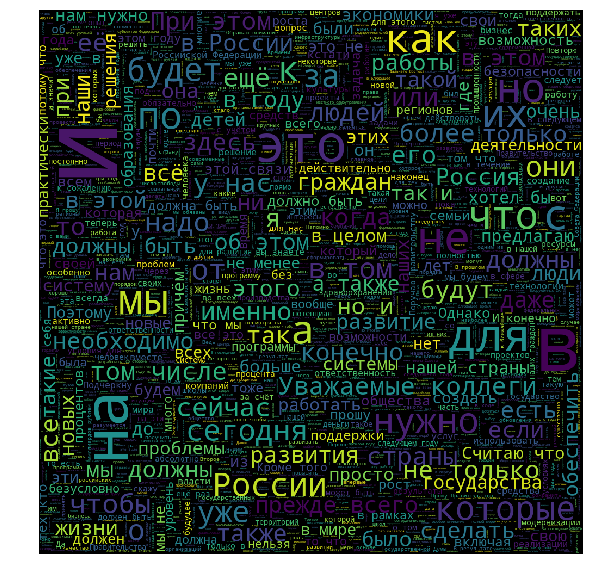

In [16]:
# plotting the wordcloud
fig, ax = plt.subplots(figsize=(10,10));
ax.imshow(wordcloud, interpolation='bilinear');
ax.set_axis_off();

plt.imshow(wordcloud);
wordcloud.to_file('..\\reports\\figures\\cart_wordcloud.png')